In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

name_columns =[  
    "Идентификатор пассажира",
    "Выжил",
    "Класс билета", 
    "Имя",
    "Пол",
    "Возраст",
    "Количество братьев/сестер/супругов на борту",
    "Количество родителей/детей на борту",
    "Номер билета",
    "Стоимость билета",
    "Номер каюты",
    "Порт посадки"
    ]

df = pd.read_csv('../lesson_6/data_tms.csv', header=0, delimiter=r",")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
from sklearn.preprocessing import StandardScaler
# Выбор признаков
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
features = df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']].copy()


features['Age'].fillna(features['Age'].median(), inplace=True)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

C:\Temp\ipykernel_14892\533637724.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['Age'].fillna(features['Age'].median(), inplace=True)


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = labels_kmeans


In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = labels_dbscan


In [35]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

df['GMM_Cluster'] = labels_gmm


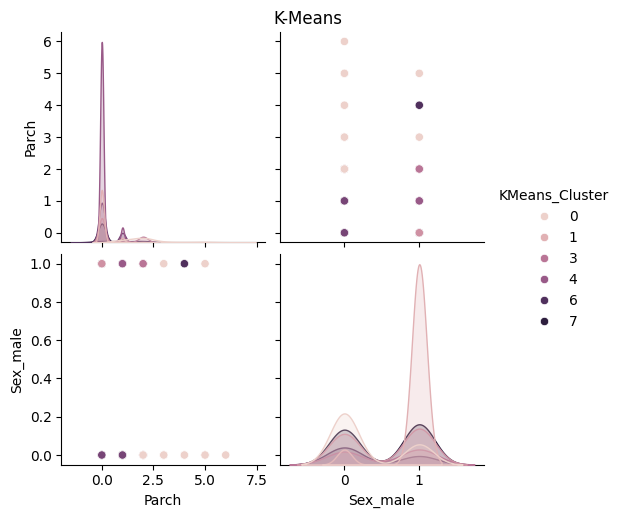

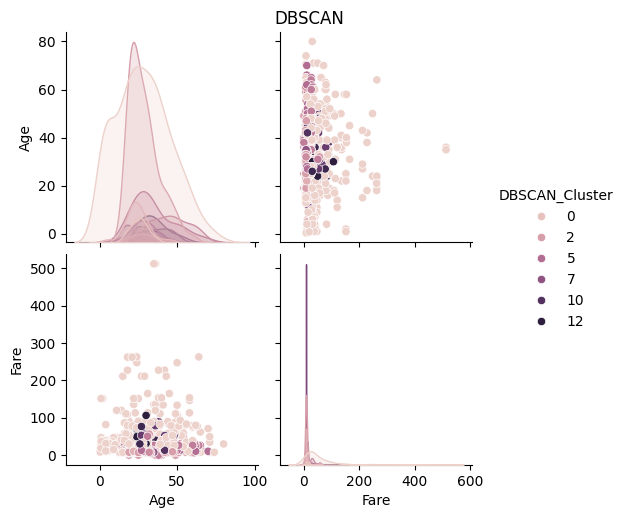

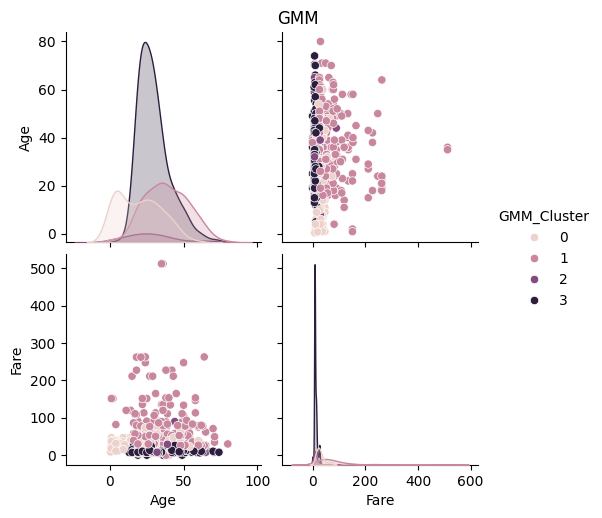

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=['Parch', 'Sex_male'], hue='KMeans_Cluster')
plt.suptitle("K-Means", y=1.02)
plt.show()

sns.pairplot(df, vars=['Age', 'Fare'], hue='DBSCAN_Cluster')
plt.suptitle("DBSCAN", y=1.02)
plt.show()

sns.pairplot(df, vars=['Age', 'Fare'], hue='GMM_Cluster')
plt.suptitle("GMM", y=1.02)
plt.show()


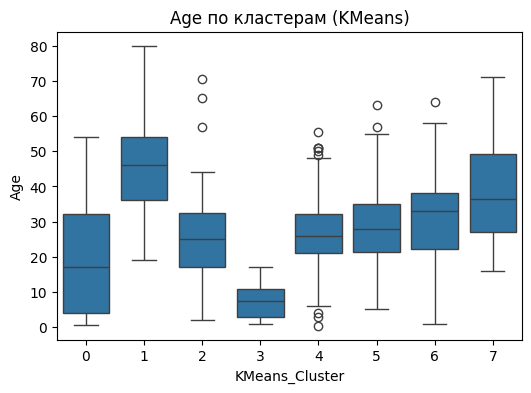

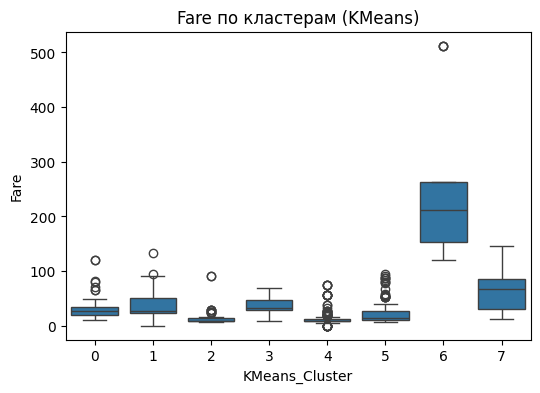

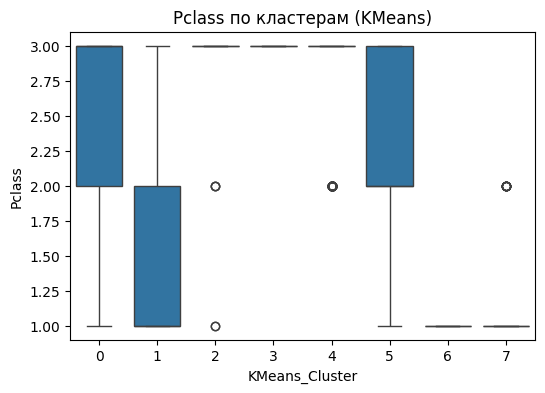

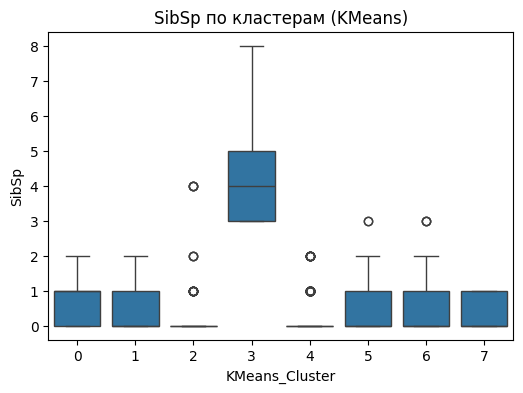

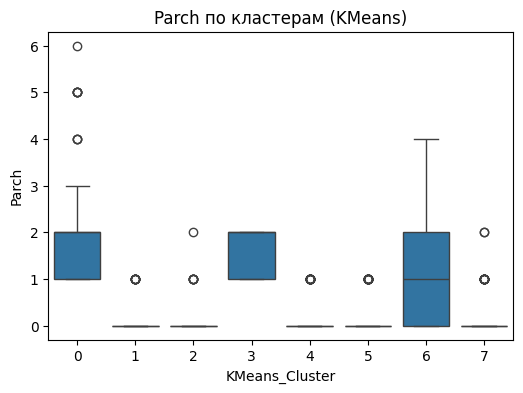

In [37]:
# Пример для KMeans
df.groupby('KMeans_Cluster')[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].mean().round(2)
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='KMeans_Cluster', y=col, data=df)
    plt.title(f"{col} по кластерам (KMeans)")
    plt.show()


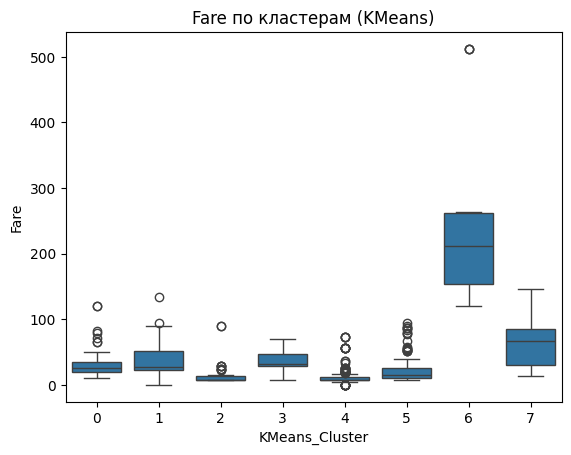

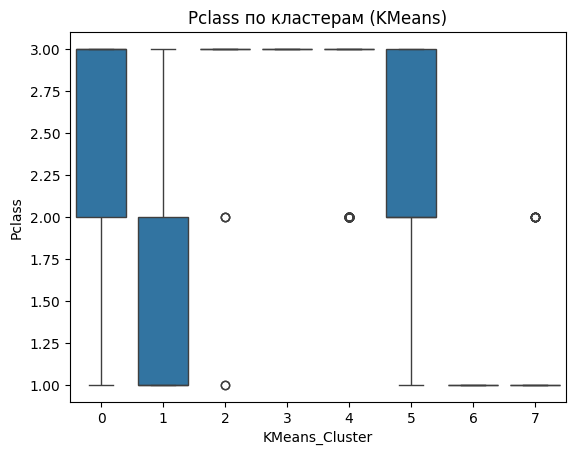

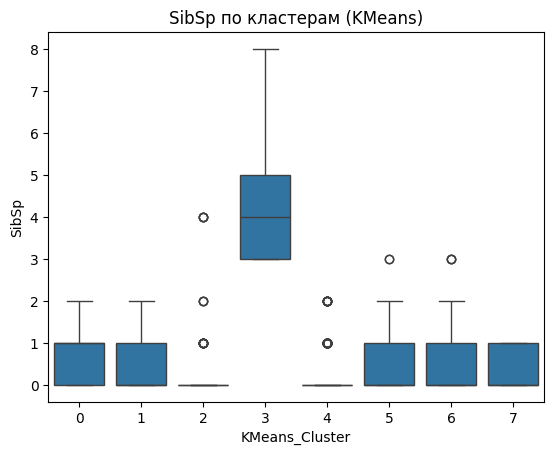

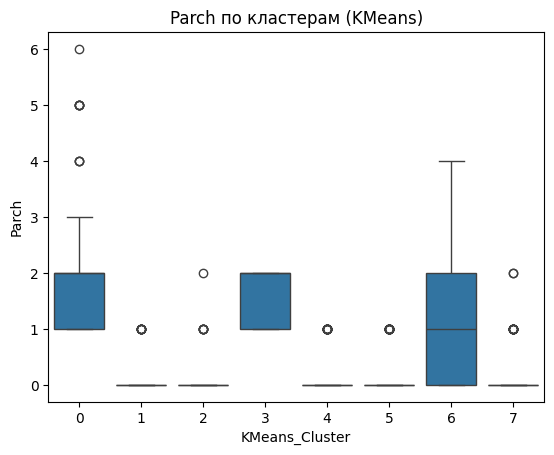

In [38]:
df.groupby('KMeans_Cluster')[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].mean().round(2)

for col in ['Fare', 'Pclass', 'SibSp', 'Parch']:
    sns.boxplot(x='KMeans_Cluster', y=col, data=df)
    plt.title(f"{col} по кластерам (KMeans)")
    plt.show()


In [39]:
pd.crosstab(df['KMeans_Cluster'], df['Sex_male'], normalize='index')
pd.crosstab(df['KMeans_Cluster'], df['Age'], normalize='index')


Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.014286,0.028571,0.028571,0.000000,0.071429,0.057143,0.042857,0.085714,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029703,0.009901,0.009901,0.009901,0.009901,0.019802,0.000000,0.000000,0.009901,0.009901
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.037037,0.000000,...,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.153846,0.076923,0.076923,0.038462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003817,0.003817,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007937,...,0.000000,0.007937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013889,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000


In [40]:
def describe_cluster(cluster_id):
    sub = df[df['KMeans_Cluster'] == cluster_id]
    print(f"Кластер {cluster_id}:")
    print(f"- Средний возраст: {sub['Age'].mean():.1f}")
    print(f"- Средний тариф: {sub['Fare'].mean():.1f}")
    print(f"- Доля мужчин: {sub['Sex_male'].mean():.2f}")
    print(f"- Средний класс: {sub['Pclass'].mean():.1f}")
    print()

for i in sorted(df['KMeans_Cluster'].unique()):
    describe_cluster(i)


Кластер 0:
- Средний возраст: 18.3
- Средний тариф: 30.7
- Доля мужчин: 0.28
- Средний класс: 2.4

Кластер 1:
- Средний возраст: 45.8
- Средний тариф: 34.2
- Доля мужчин: 0.93
- Средний класс: 1.3

Кластер 2:
- Средний возраст: 27.7
- Средний тариф: 13.1
- Доля мужчин: 0.54
- Средний класс: 2.9

Кластер 3:
- Средний возраст: 7.5
- Средний тариф: 39.3
- Доля мужчин: 0.54
- Средний класс: 3.0

Кластер 4:
- Средний возраст: 26.9
- Средний тариф: 11.5
- Доля мужчин: 1.00
- Средний класс: 2.8

Кластер 5:
- Средний возраст: 28.6
- Средний тариф: 22.7
- Доля мужчин: 0.00
- Средний класс: 2.3

Кластер 6:
- Средний возраст: 31.0
- Средний тариф: 227.0
- Доля мужчин: 0.33
- Средний класс: 1.0

Кластер 7:
- Средний возраст: 38.7
- Средний тариф: 66.0
- Доля мужчин: 0.54
- Средний класс: 1.1



In [41]:
def describe_dbscan_cluster(cluster_id):
    sub = df[df['DBSCAN_Cluster'] == cluster_id]
    print(f"DBSCAN — кластер {cluster_id}:")
    print(f"- Кол-во пассажиров: {len(sub)}")
    print(f"- Средний возраст: {sub['Age'].mean():.1f}")
    print(f"- Средний тариф: {sub['Fare'].mean():.1f}")
    print(f"- Доля мужчин: {sub['Sex_male'].mean():.2f}")
    print(f"- Средний класс: {sub['Pclass'].mean():.1f}")
    print()

for i in sorted(df['DBSCAN_Cluster'].unique()):
    describe_dbscan_cluster(i)


DBSCAN — кластер -1:
- Кол-во пассажиров: 367
- Средний возраст: 28.1
- Средний тариф: 56.2
- Доля мужчин: 0.43
- Средний класс: 2.1

DBSCAN — кластер 0:
- Кол-во пассажиров: 17
- Средний возраст: 25.5
- Средний тариф: 12.5
- Доля мужчин: 1.00
- Средний класс: 3.0

DBSCAN — кластер 1:
- Кол-во пассажиров: 29
- Средний возраст: 24.2
- Средний тариф: 8.5
- Доля мужчин: 0.00
- Средний класс: 3.0

DBSCAN — кластер 2:
- Кол-во пассажиров: 201
- Средний возраст: 28.6
- Средний тариф: 9.9
- Доля мужчин: 1.00
- Средний класс: 3.0

DBSCAN — кластер 3:
- Кол-во пассажиров: 27
- Средний возраст: 28.2
- Средний тариф: 8.6
- Доля мужчин: 1.00
- Средний класс: 3.0

DBSCAN — кластер 4:
- Кол-во пассажиров: 50
- Средний возраст: 45.1
- Средний тариф: 28.5
- Доля мужчин: 1.00
- Средний класс: 1.0

DBSCAN — кластер 5:
- Кол-во пассажиров: 65
- Средний возраст: 34.2
- Средний тариф: 12.4
- Доля мужчин: 1.00
- Средний класс: 2.0

DBSCAN — кластер 6:
- Кол-во пассажиров: 12
- Средний возраст: 26.0
- Средни

In [42]:
def describe_gmm_cluster(cluster_id):
    sub = df[df['GMM_Cluster'] == cluster_id]
    print(f"GMM — кластер {cluster_id}:")
    print(f"- Кол-во пассажиров: {len(sub)}")
    print(f"- Средний возраст: {sub['Age'].mean():.1f}")
    print(f"- Средний тариф: {sub['Fare'].mean():.1f}")
    print(f"- Доля мужчин: {sub['Sex_male'].mean():.2f}")
    print(f"- Средний класс: {sub['Pclass'].mean():.1f}")
    print()

for i in sorted(df['GMM_Cluster'].unique()):
    describe_gmm_cluster(i)


GMM — кластер 0:
- Кол-во пассажиров: 174
- Средний возраст: 19.9
- Средний тариф: 29.3
- Доля мужчин: 0.48
- Средний класс: 2.7

GMM — кластер 1:
- Кол-во пассажиров: 214
- Средний возраст: 38.2
- Средний тариф: 84.1
- Доля мужчин: 0.57
- Средний класс: 1.0

GMM — кластер 2:
- Кол-во пассажиров: 77
- Средний возраст: 28.1
- Средний тариф: 13.3
- Доля мужчин: 0.53
- Средний класс: 2.9

GMM — кластер 3:
- Кол-во пассажиров: 426
- Средний возраст: 29.6
- Средний тариф: 10.7
- Доля мужчин: 0.78
- Средний класс: 2.7



In [43]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



df = pd.read_csv('../lesson_6/data_tms.csv', header=0, delimiter=r",")
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Ticket'] = df['Ticket'].fillna('Unknown')
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0].strip())

In [44]:
G = nx.Graph()

# Добавляем узлы
for idx, row in df.iterrows():
    G.add_node(row['PassengerId'], **row.to_dict())

# Добавляем связи по билету
for ticket in df['Ticket'].unique():
    passengers = df[df['Ticket'] == ticket]['PassengerId'].tolist()
    for i in range(len(passengers)):
        for j in range(i + 1, len(passengers)):
            G.add_edge(passengers[i], passengers[j], type='ticket')

# Добавляем связи по фамилии (семья)
for name in df['LastName'].unique():
    passengers = df[df['LastName'] == name]['PassengerId'].tolist()
    for i in range(len(passengers)):
        for j in range(i + 1, len(passengers)):
            G.add_edge(passengers[i], passengers[j], type='family')


In [45]:
import community as community_louvain

partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, 'community')
df['GraphCluster'] = df['PassengerId'].map(partition)


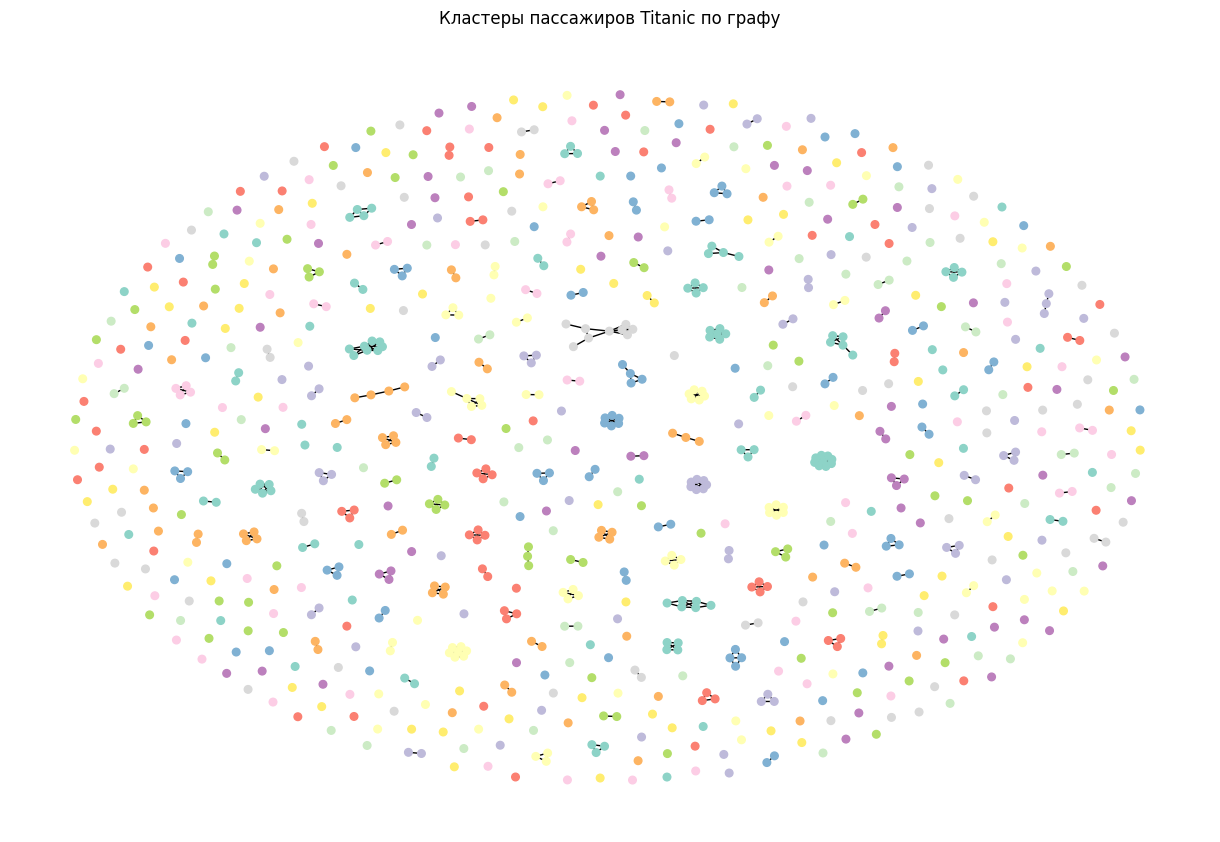

In [ ]:
pos = nx.spring_layout(G, seed=42)
colors = [partition[node] for node in G.nodes()]
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=30, cmap=plt.cm.Set3)
plt.title("Кластеры пассажиров Титаник по графу")
plt.show()


In [47]:
df.groupby('GraphCluster')[['Age', 'Fare', 'Pclass']].mean().round(2)


,Age,Fare,Pclass
GraphCluster,,,
0,25.5,7.15,3.0
1,38.0,71.28,1.0
2,26.0,7.92,3.0
3,36.0,53.10,1.0
4,30.5,160.52,1.5
...,...,...,...
604,15.0,7.22,3.0
605,NaN,7.90,3.0
606,33.0,7.90,3.0


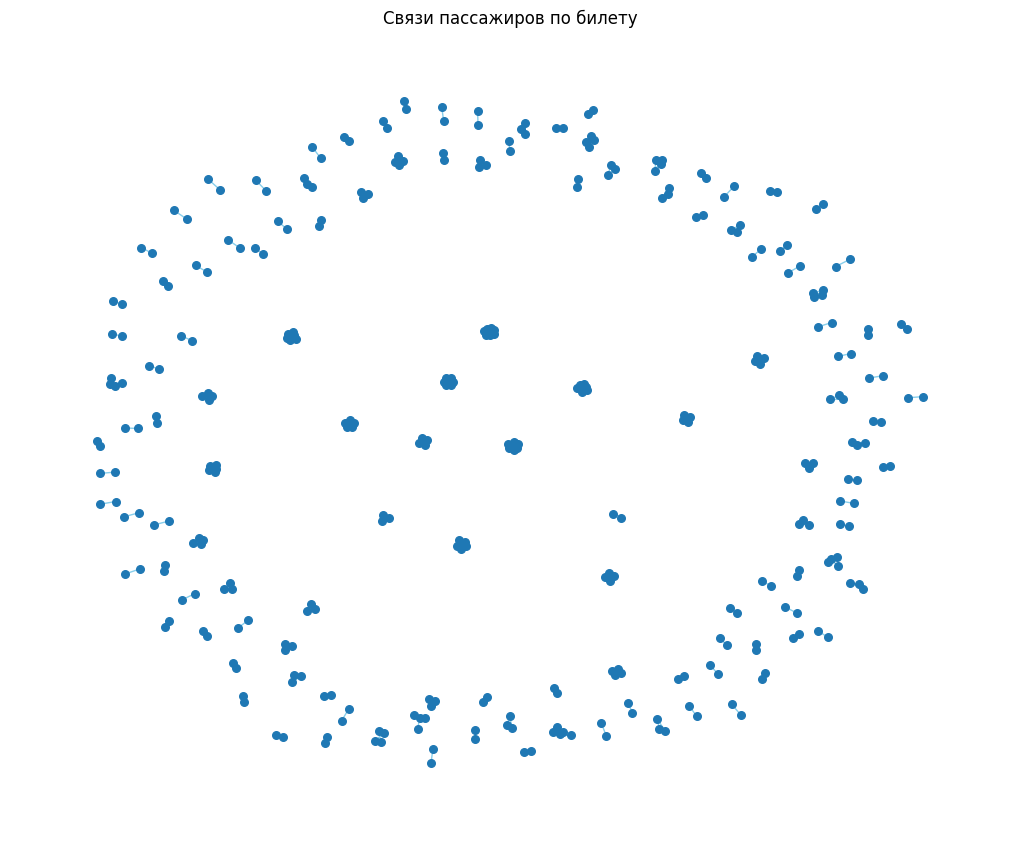

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

# Граф по билетам
G_ticket = nx.Graph()
for ticket in df['Ticket'].unique():
    passengers = df[df['Ticket'] == ticket]['PassengerId'].tolist()
    for i in range(len(passengers)):
        for j in range(i + 1, len(passengers)):
            G_ticket.add_edge(passengers[i], passengers[j])

plt.figure(figsize=(10, 8))
nx.draw(G_ticket, node_size=30, with_labels=False, edge_color='skyblue')
plt.title("Связи пассажиров по билету")
plt.show()


Выводы:
Плотные группы — это пассажиры, купившие один билет (семьи, пары, группы).

Некоторые билеты объединяют 3+ человек → потенциальные семейные или групповые путешествия.

Эти связи могут быть важны для анализа выживаемости: часто члены одной группы выживали/погибали вместе.

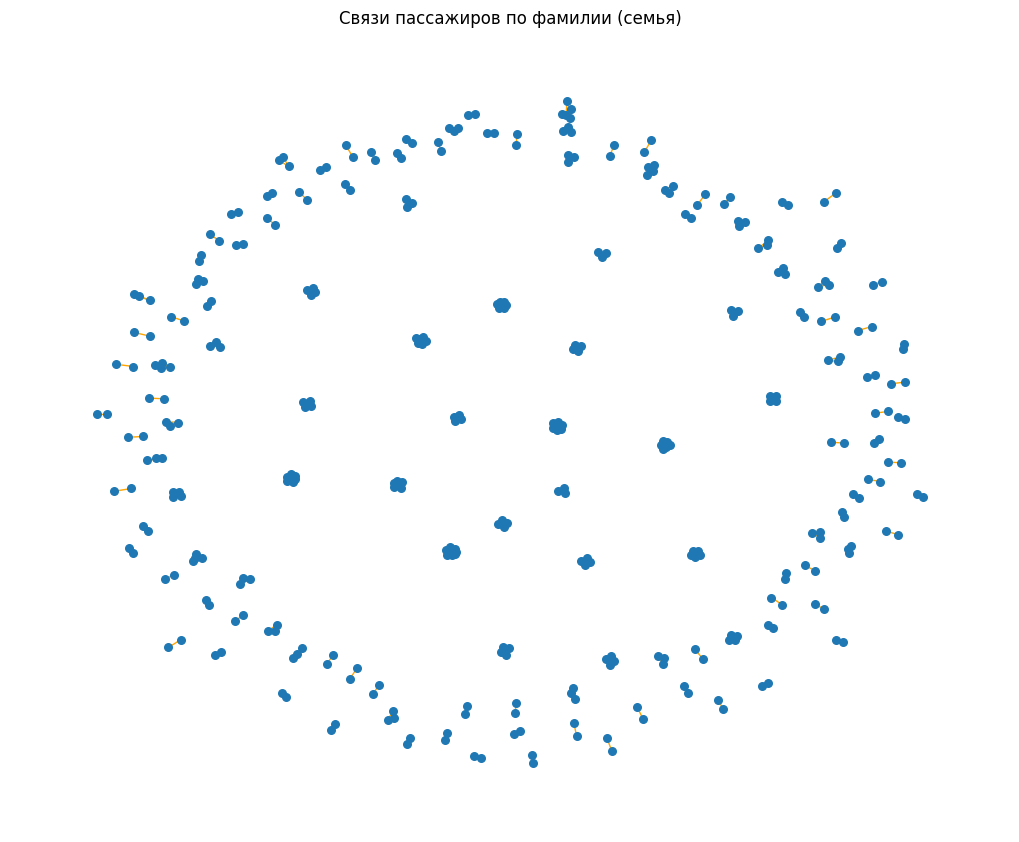

In [49]:
# Граф по фамилиям
G_family = nx.Graph()
for name in df['LastName'].unique():
    passengers = df[df['LastName'] == name]['PassengerId'].tolist()
    for i in range(len(passengers)):
        for j in range(i + 1, len(passengers)):
            G_family.add_edge(passengers[i], passengers[j])

plt.figure(figsize=(10, 8))
nx.draw(G_family, node_size=30, with_labels=False, edge_color='orange')
plt.title("Связи пассажиров по фамилии (семья)")
plt.show()


Связи по фамилии выявляют семейные группы, даже если билеты разные.

Некоторые фамилии встречаются у 4+ пассажиров → большие семьи.

Эти связи можно использовать для построения графа выживания по семье — например, кто из семьи выжил, а кто нет.

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Добавим фамилии
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0].strip())

# Создаём граф
G_family = nx.Graph()

# Узлы: пассажиры
for idx, row in df.iterrows():
    G_family.add_node(row['PassengerId'], survived=row['Survived'], name=row['Name'])

# Рёбра: общая фамилия
for name in df['LastName'].unique():
    group = df[df['LastName'] == name]['PassengerId'].tolist()
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            G_family.add_edge(group[i], group[j])


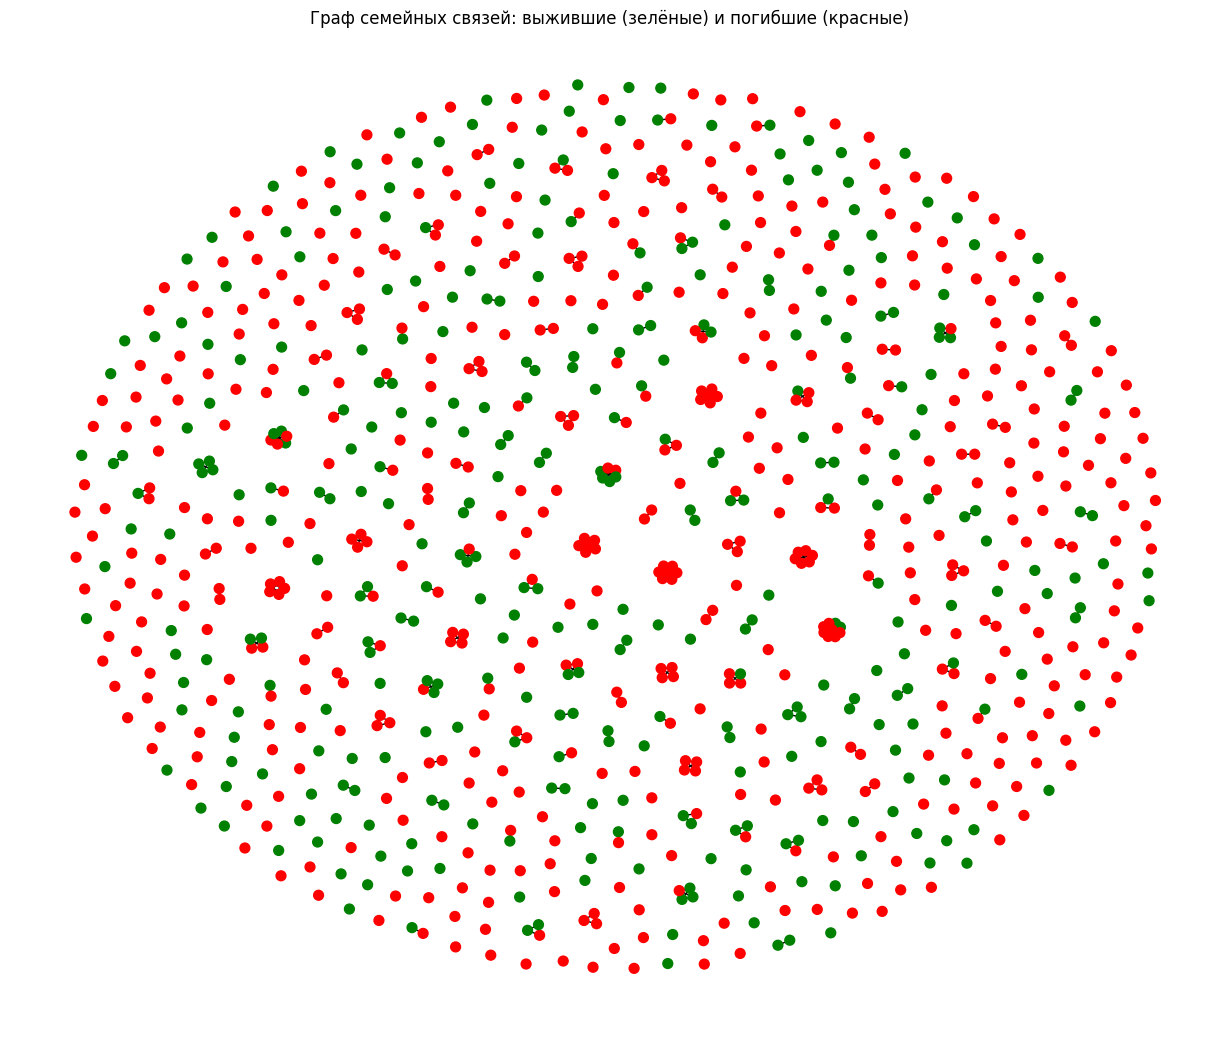

In [51]:
# Цвет узлов: зелёный — выжил, красный — погиб
node_colors = ['green' if G_family.nodes[n]['survived'] == 1 else 'red' for n in G_family.nodes]

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_family, seed=42)
nx.draw(G_family, pos, node_color=node_colors, node_size=50, with_labels=False)
plt.title("Граф семейных связей: выжившие (зелёные) и погибшие (красные)")
plt.show()


Выводы:
Видны семейные группы, где все выжили или все погибли — возможно, они были вместе и принимали общие решения.
Некоторые семьи разделились: часть выжила, часть нет — можно исследовать, были ли они в разных классах или каютах.
Этот граф помогает визуально оценить влияние семейных связей на выживание.